# ASSIGNMENT 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function

Tạo dữ liệu bằng cách lấy các điểm theo phân phối chuẩn có kỳ vọng tại (2, 2), (8, 3), (3, 6), ma trận hiệp phương sai giống nhau và là ma trận đơn vị. Mỗi cụm có 200 điểmđiểm

In [19]:
np.random.seed(10)

u1 = [2, 2]
u2 = [8, 3]
u3 = [3, 6]
cov = [[1, 0], [0, 1]]
N = 200

cluster1 = np.random.multivariate_normal(u1, cov, N)
cluster2 = np.random.multivariate_normal(u2, cov, N)
cluster3 = np.random.multivariate_normal(u3, cov, N)

clusters = np.concatenate([cluster1, cluster2, cluster3], axis=0)
k = 3
original_label = np.repeat([0, 1, 2], N)

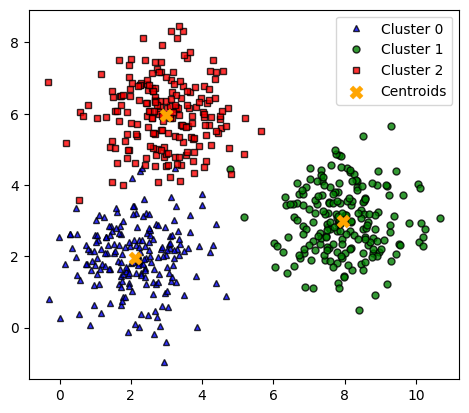

In [34]:
def kmeans_display(clusters, labels, centroids=None):
    cluster1 = clusters[labels == 0]
    cluster2 = clusters[labels == 1]
    cluster3 = clusters[labels == 2]
    
    style_args = {'markersize': 5, 'alpha': 0.8, 'markeredgecolor': 'k'}
    plt.plot(cluster1[:, 0], cluster1[:, 1], 'b^', label='Cluster 0', **style_args)
    plt.plot(cluster2[:, 0], cluster2[:, 1], 'go', label='Cluster 1', **style_args)
    plt.plot(cluster3[:, 0], cluster3[:, 1], 'rs', label='Cluster 2', **style_args)

    # Vẽ dấu X tại các centroid
    if centroids is not None:
        plt.scatter(centroids[:, 0], centroids[:, 1], 
                    marker='X', s=90, c='orange', linewidths=0.3, 
                    label='Centroids', zorder=10)

    plt.axis([-3, 14, -2, 10])
    plt.axis('scaled')
    plt.legend()
    plt.show()


kmeans_display(clusters, original_label, centroids)

- kmeans_init_centroids — khởi tạo tâm cụm
- kmeans_assign_labels — gán nhãn cho mỗi điểm dựa trên tâm cụm gần nhất
- kmeans_update_centroids — cập nhật tâm cụm mới
- kmeans_converged — kiểm tra điều kiện hội tụ

In [5]:
import numpy as np

def kmeans_init_centroids(X, k):
    np.random.seed(10)
    random_idx = np.random.choice(X.shape[0], k, replace=False)
    centroids = X[random_idx]
    return centroids

def kmeans_assign_labels(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    labels = np.argmin(distances, axis=1)
    return labels

def kmeans_update_centroids(X, labels, k):
    centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    return centroids

def kmeans_converged(old_centroids, new_centroids):
    old_set = set([tuple(a) for a in old_centroids])
    new_set = set([tuple(a) for a in new_centroids])
    return old_set == new_set

def kmeans(X, k, max_iters=100):
    centroids = kmeans_init_centroids(X, k)
    for it in range(1, max_iters + 1):
        labels = kmeans_assign_labels(X, centroids)
        new_centroids = kmeans_update_centroids(X, labels, k)
        if kmeans_converged(centroids, new_centroids):
            break
        centroids = new_centroids
    return centroids, labels, it
def compute_loss(X, labels, centroids):
    return np.sum((X - centroids[labels])**2)

K-means hội tụ sau 3 vòng lặp.
Toạ độ centroids cuối cùng:
[[7.96721295 2.98128265]
 [2.10539793 1.93909392]
 [2.98686864 5.97361989]]


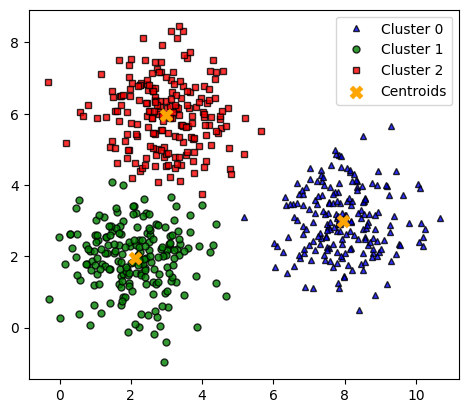

In [33]:
k = 3
centroids, labels, it = kmeans(clusters, k)

print(f"K-means hội tụ sau {it} vòng lặp.")
print("Toạ độ centroids cuối cùng:")
print(centroids)

kmeans_display(clusters, labels, centroids)


Về phân bố dữ liệu ban đầu (original_label):
- Số cụm rõ ràng và rời rạc: mỗi cụm có độ dày ở giữa và loãng dần ra bên ngoài, phù hợp với đặc trưng của phân phối Gaussian. 
- Vị trí cụm tương ứng với các phân phối đã cho.
- Độ phân tách giữa các cụm tốt: ít bị chồng lấn giữa các cụm
- Hình dạng cụm phù hợp với giả định K-means.

Sau khi áp dụng K-means, ta thấy:
- Phân cụm nhìn chung chính xác: 3 cụm cluster1, cluster2, cluster3 được phân tách rõ ràng và gần đúng với trực quan của dữ liệu, các cụm không bị chồng lấn nhau -> tâm cụm ban đầu rơi vào các vùng hợp lý.
- Kết quả phụ thuộc nhiều vào kết quả ban đầu: hội tụ sau 3 vòng lặp, chứng tỏ khởi tạo ban đầu khá tốt.
- Tuy nhiên, không thể đảm bảo đây là phân cụm tối ưu toàn cục. Nếu có nhiều nhiễu, dữ liệu lệch tâm hoặc số cụm k chưa hợp lý -> dễ gây phân cụm sai 

Tóm lại, trong assignment 1, kết quả phân cụm từ K-means tốt và hội tụ nhanh nhờ khởi tạo ban đầu khá phù hợp. Nếu thay đổi khởi tạo, kết quả có thể rất khác. 

# ASSIGNMENT 2 

In [35]:
np.random.seed(10)

u1 = [2, 2]
u2 = [8, 3]
u3 = [3, 6] 

cluster1 = np.random.multivariate_normal(u1, cov, 50)
cluster2 = np.random.multivariate_normal(u2, cov, 20)
cluster3 = np.random.multivariate_normal(u3, cov, 1000)
clusters = np.concatenate([cluster1, cluster2, cluster3], axis=0)
original_label = np.concatenate([np.repeat(0, 50), np.repeat(1, 20), np.repeat(2, 1000)])